# Requirements

In [3]:
import pandas as pd
import missingno as msno
import numpy as np
from sklearn.ensemble import RandomForestClassifier

In [ ]:
# Add as many imports as you need.

## Blood Pressure Analysis


# Dataset Description

## Attributes

* id - patient identifier
* age - patient age
* height - patient height in cm
* weight - patient weight in kg
* blood sugar - patient blood sugar level
* Cholesterol - patient cholesterol level
* triglyceride - patient triglyceride level
* HDL - patient high-density lipoprotein cholesterol level
* LDL - patient low-density lipoprotein cholesterol level
* hemoglobin - patient hemoglobin level
* Urine protein - patinet protein in urine level
* serum creatinine - patient serum creatinine level
* AST - patient aspartate aminotransferase level
* ALT - patient Alanine transaminase level
* Gtp - patient Guanosine-5'-triphosphate level
* dental caries - does patient have dental caries

### Target variable
* blood - patient systolic blood pressure

# Read the dataset

In [ ]:
# Write your code here. Add as many boxes as you need.

In [4]:
df = pd.read_csv("./data/blood_pressure_data.csv")
df2 = df.copy()

Explore the dataset using visualizations of your choice.

In [ ]:
# Write your code here. Add as many boxes as you need.

In [5]:
import seaborn as sns

In [6]:
df2.head()

,id,age,height(cm),weight(kg),relaxation,blood sugar,Cholesterol,triglyceride,HDL,LDL,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,dental caries,blood pressure
0,NaN,NaN,180.0,65.0,70.0,NaN,149.0,NaN,NaN,87.0,13.9,1.0,NaN,19.0,NaN,NaN,No,112.0
1,57468.0,7/5/1979,150.0,50.0,88.0,92.0,219.0,LOW,NaN,137.0,13.2,NaN,0.6,26.0,17.0,NaN,No,138.0
2,55209.0,11/27/1954,175.0,75.0,NaN,NaN,217.0,NORMAL,50.0,142.0,NaN,1.0,0.8,22.0,22.0,NaN,No,137.0
3,3335.0,9/13/1984,160.0,NaN,NaN,100.0,160.0,HiGH,48.0,84.0,12.1,1.0,0.6,15.0,19.0,14.0,No,133.0
4,70782.0,8/15/1984,170.0,NaN,68.0,99.0,176.0,LOW,NaN,96.0,13.8,1.0,0.9,33.0,NaN,11.0,No,NaN


In [20]:
df2['blood pressure'].unique()

array([112., 138., 137., 133.,  nan, 120., 132., 114., 100., 136., 118.,
       130., 104., 150., 117., 103., 110., 148., 111., 152., 141., 128.,
       122., 124., 125., 143., 129., 170., 126., 121., 142., 116.,  97.,
       131., 123., 106., 134., 107., 119., 109., 146., 108., 101., 115.,
       140., 139., 135., 157., 102., 113., 147., 127., 145.,  94., 105.,
       168.,  90., 144.,  98., 151.,  89., 158.,  96.,  99.,  93.,  92.,
       155., 149., 160., 156.,  86., 159., 166.,  95., 154., 169., 167.,
        88.,  91., 153.,  87., 181., 190., 164., 162.])

In [21]:
df2['triglyceride'].unique()

array([nan, 'LOW', 'NORMAL', 'HiGH', 'UNK', 'ABNORMAL'], dtype=object)

In [7]:
df2.drop(["id"], axis=1, inplace=True)
df2.dropna(subset=['blood pressure'], inplace=True)
#df2.dropna(df2['blood pressure'], inplace=True)

In [8]:
df2['age'] = pd.to_datetime(df2['age']).dt.year
df2

,age,height(cm),weight(kg),relaxation,blood sugar,Cholesterol,triglyceride,HDL,LDL,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,dental caries,blood pressure
0,NaN,180.0,65.0,70.0,NaN,149.0,NaN,NaN,87.0,13.9,1.0,NaN,19.0,NaN,NaN,No,112.0
1,1979.0,150.0,50.0,88.0,92.0,219.0,LOW,NaN,137.0,13.2,NaN,0.6,26.0,17.0,NaN,No,138.0
2,1954.0,175.0,75.0,NaN,NaN,217.0,NORMAL,50.0,142.0,NaN,1.0,0.8,22.0,22.0,NaN,No,137.0
3,1984.0,160.0,NaN,NaN,100.0,160.0,HiGH,48.0,84.0,12.1,1.0,0.6,15.0,19.0,14.0,No,133.0
6,1964.0,155.0,50.0,74.0,NaN,NaN,LOW,59.0,NaN,13.5,1.0,0.7,44.0,28.0,17.0,No,138.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,NaN,180.0,75.0,69.0,100.0,180.0,ABNORMAL,76.0,98.0,14.7,NaN,0.8,29.0,39.0,73.0,No,120.0
9996,NaN,160.0,NaN,72.0,100.0,NaN,NORMAL,NaN,99.0,15.3,1.0,0.7,22.0,49.0,91.0,No,110.0
9997,1989.0,165.0,65.0,72.0,83.0,207.0,NaN,65.0,134.0,NaN,1.0,0.9,20.0,21.0,23.0,No,128.0
9998,NaN,160.0,75.0,82.0,88.0,NaN,HiGH,63.0,112.0,14.4,1.0,0.9,18.0,15.0,64.0,No,121.0


In [9]:
current_year = pd.to_datetime("today").year
df2['age'] = current_year - df2['age']

In [71]:
df2.head()

,age,height(cm),weight(kg),relaxation,blood sugar,Cholesterol,triglyceride,HDL,LDL,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,dental caries,blood pressure
0,NaN,180.0,65.0,70.0,NaN,149.0,NaN,NaN,87.0,13.9,1.0,NaN,19.0,NaN,NaN,No,112.0
1,45.0,150.0,50.0,88.0,92.0,219.0,LOW,NaN,137.0,13.2,NaN,0.6,26.0,17.0,NaN,No,138.0
2,70.0,175.0,75.0,NaN,NaN,217.0,NORMAL,50.0,142.0,NaN,1.0,0.8,22.0,22.0,NaN,No,137.0
3,40.0,160.0,NaN,NaN,100.0,160.0,HiGH,48.0,84.0,12.1,1.0,0.6,15.0,19.0,14.0,No,133.0
6,60.0,155.0,50.0,74.0,NaN,NaN,LOW,59.0,NaN,13.5,1.0,0.7,44.0,28.0,17.0,No,138.0


In [10]:
import matplotlib.pyplot as plt

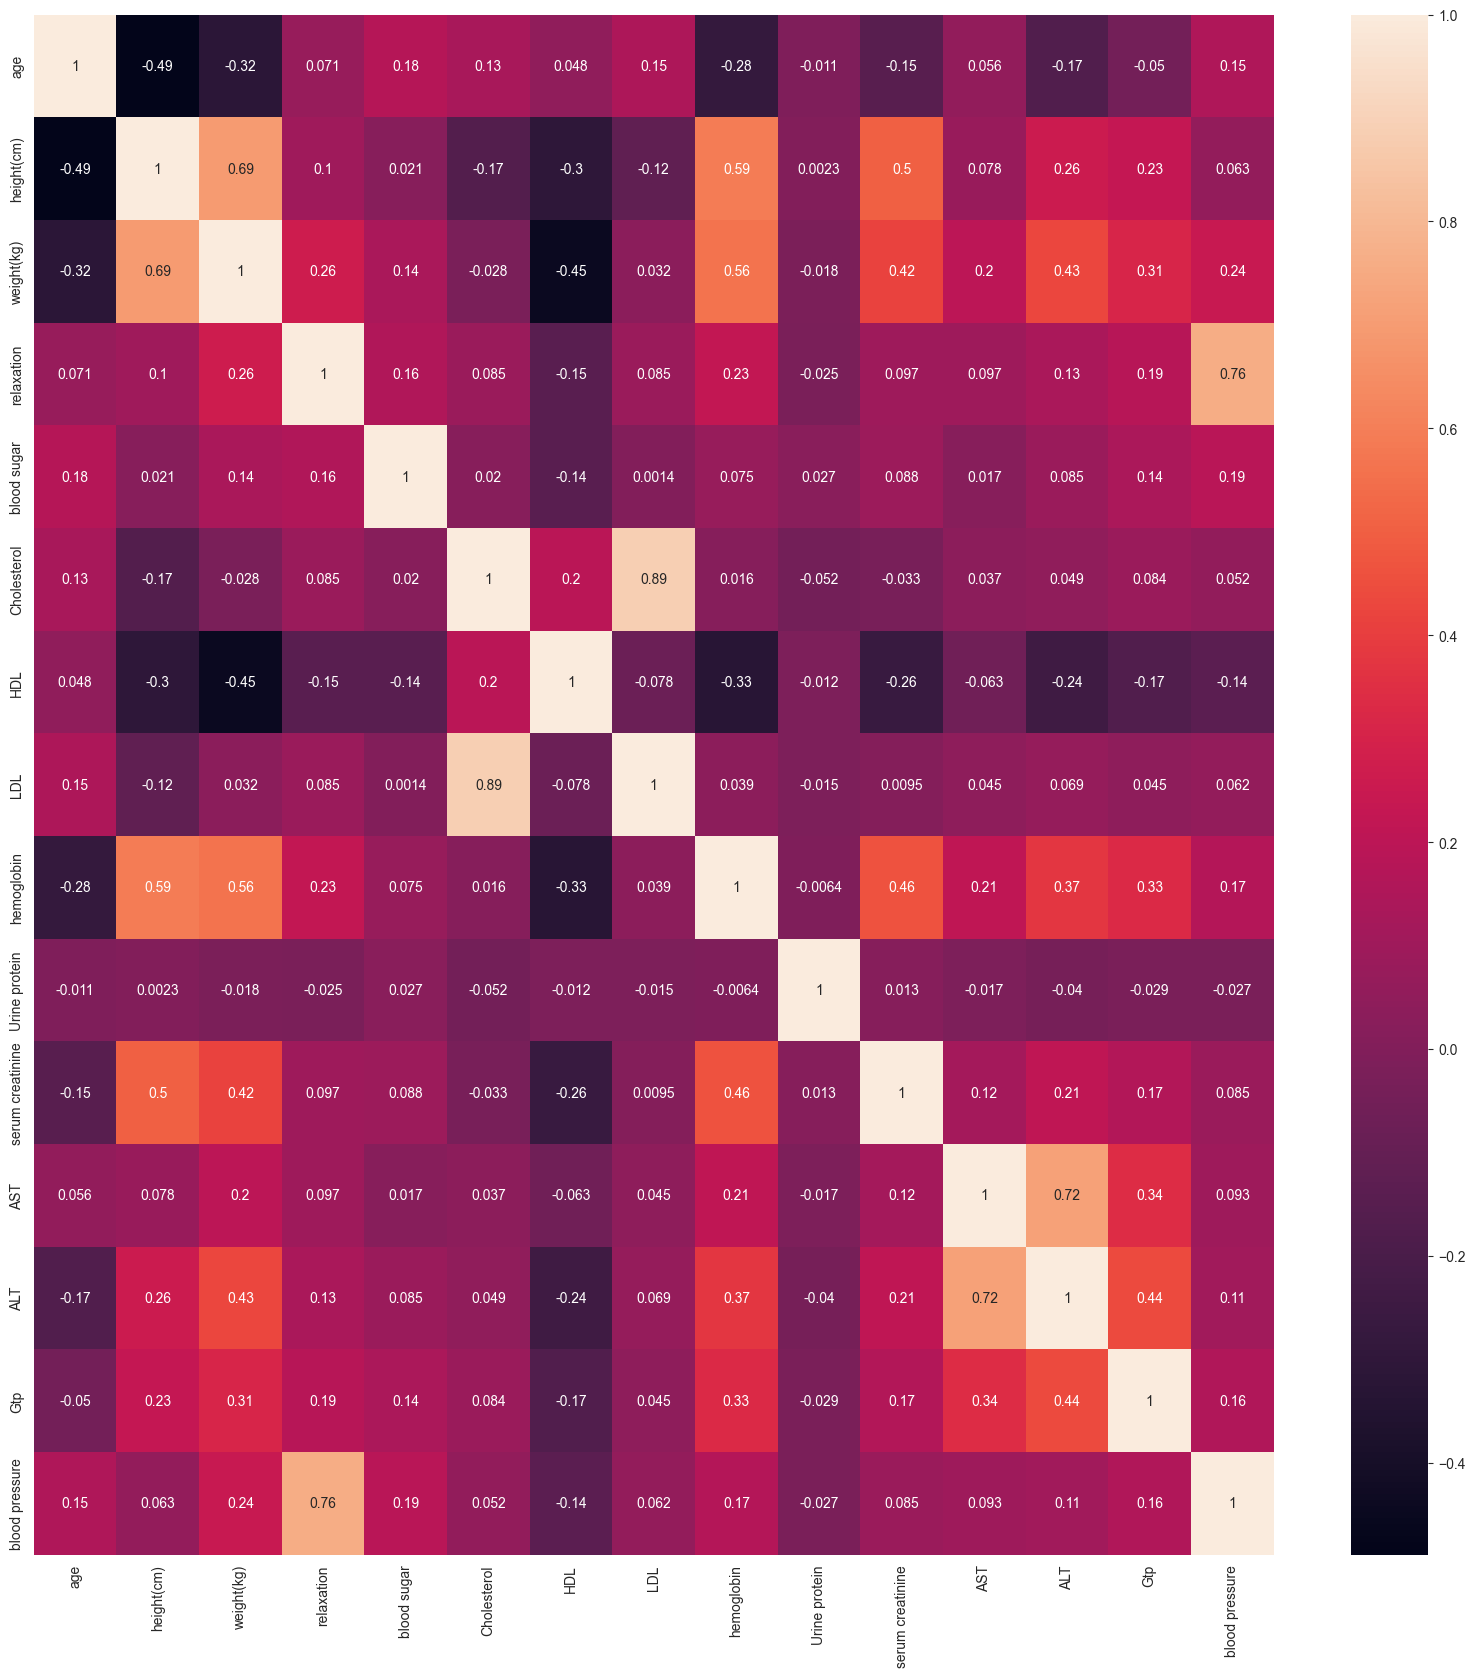

In [11]:
plt.figure(figsize=(20, 20))
sns.heatmap(df2.drop(['triglyceride', 'dental caries'], axis=1).corr(), annot=True)
plt.show()

blood pressure -> relaxation
LDL -> cholesterol
hemoglobin -> weight, height
ALT -> AST

## Detecting Missing Values
Calculate the percentage of missing values present in each column of the dataset.

In [ ]:
# Write your code here. Add as many boxes as you need.

In [12]:
missing_percentage = df2.isnull().sum() / len(df2) * 100
print(missing_percentage)

age                 26.507958
height(cm)          26.307343
weight(kg)          25.772369
relaxation          25.545005
blood sugar         26.039856
Cholesterol         26.293968
triglyceride        13.467968
HDL                 26.240471
LDL                 26.293968
hemoglobin          26.227096
Urine protein       25.424636
serum creatinine    25.692123
AST                 25.718871
ALT                 25.665374
Gtp                 25.772369
dental caries        0.000000
blood pressure       0.000000
dtype: float64


## Understanding the Causes Behind Missing Values
Using visualization tools such as heatmaps, and dendrograms, illustrate the interdependence between attributes with missing values. Also, visualize the distribution of the missing values within the dataset using matrices and bar charts. To achieve this use the `missingno` library.

In [ ]:
# Write your code here. Add as many boxes as you need.

In [13]:
import missingno as msno

<Axes: >

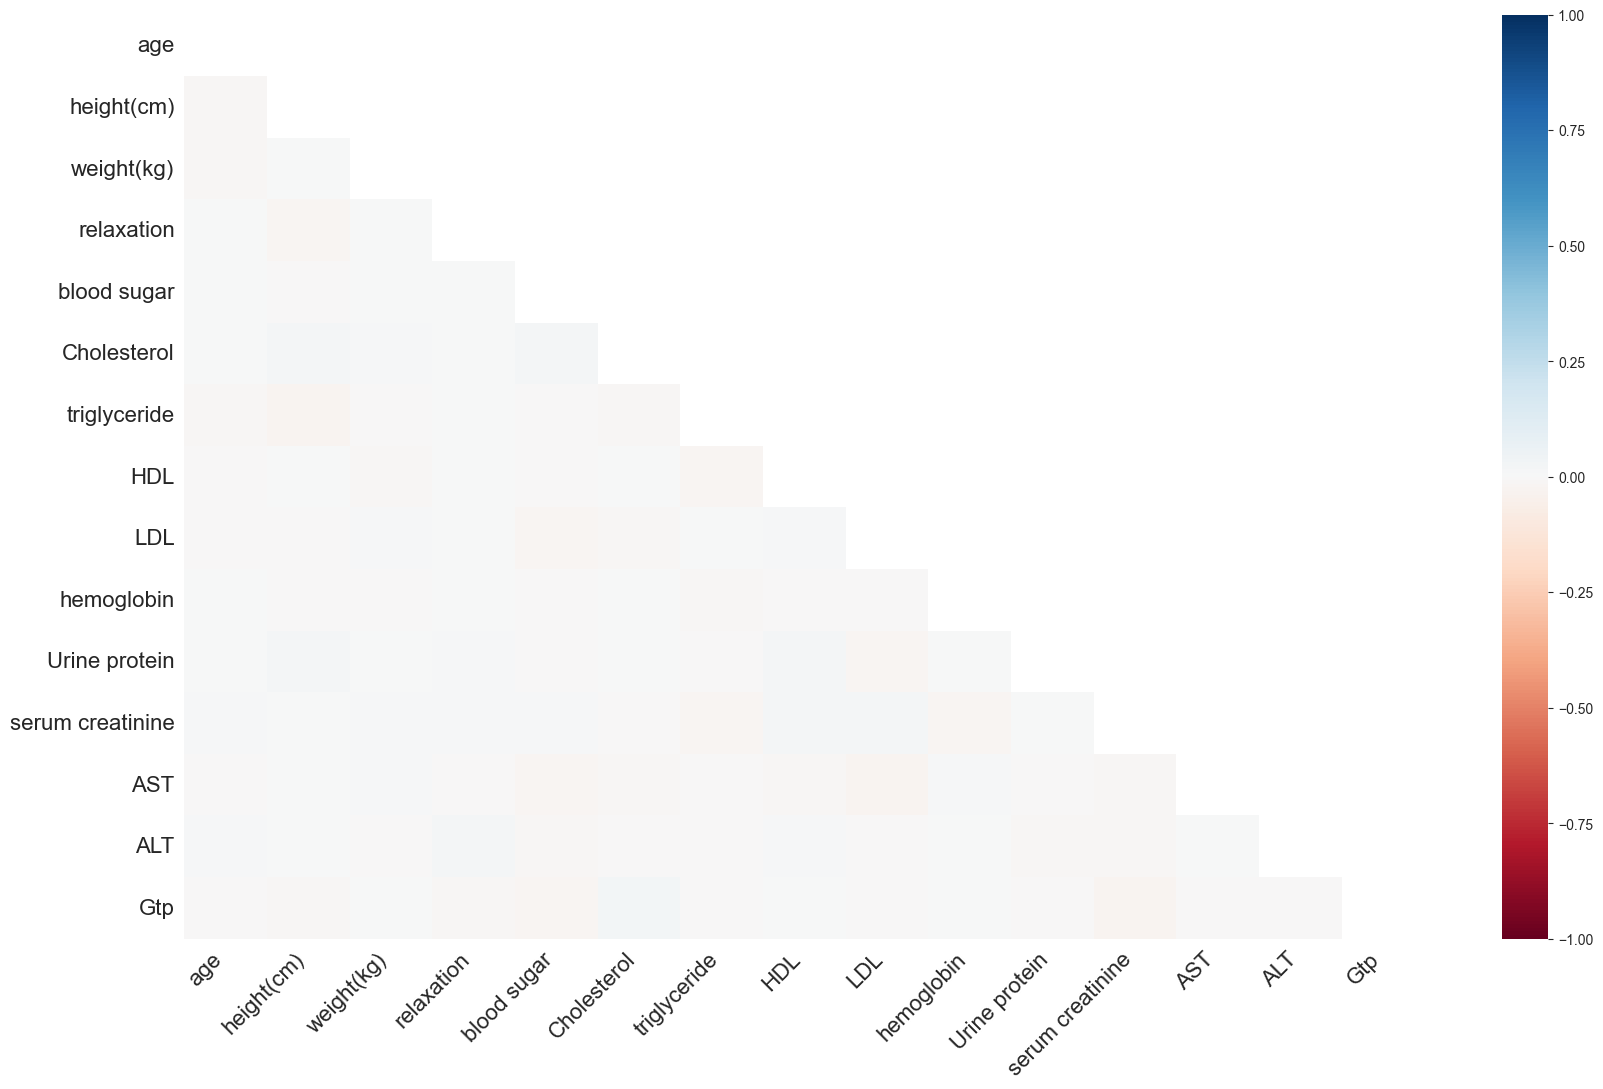

In [16]:
msno.heatmap(df2)

<Axes: >

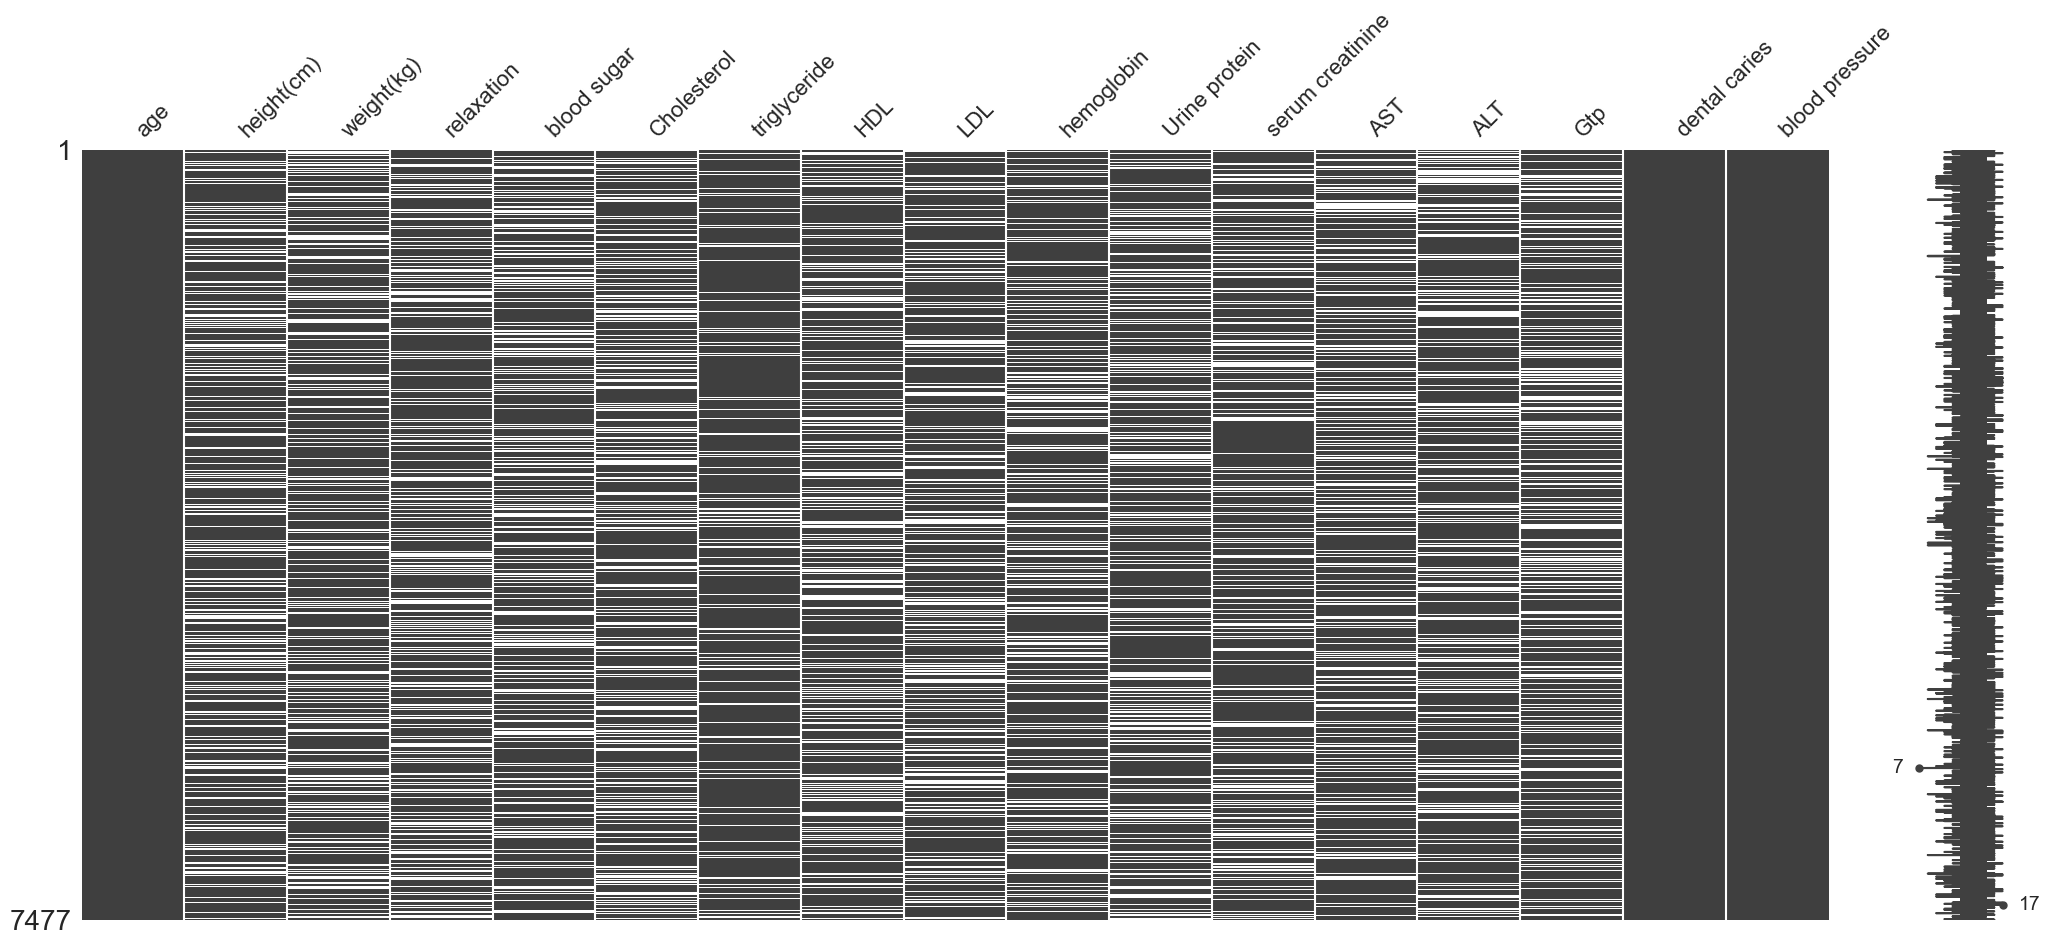

In [44]:
msno.matrix(df2)

<Axes: >

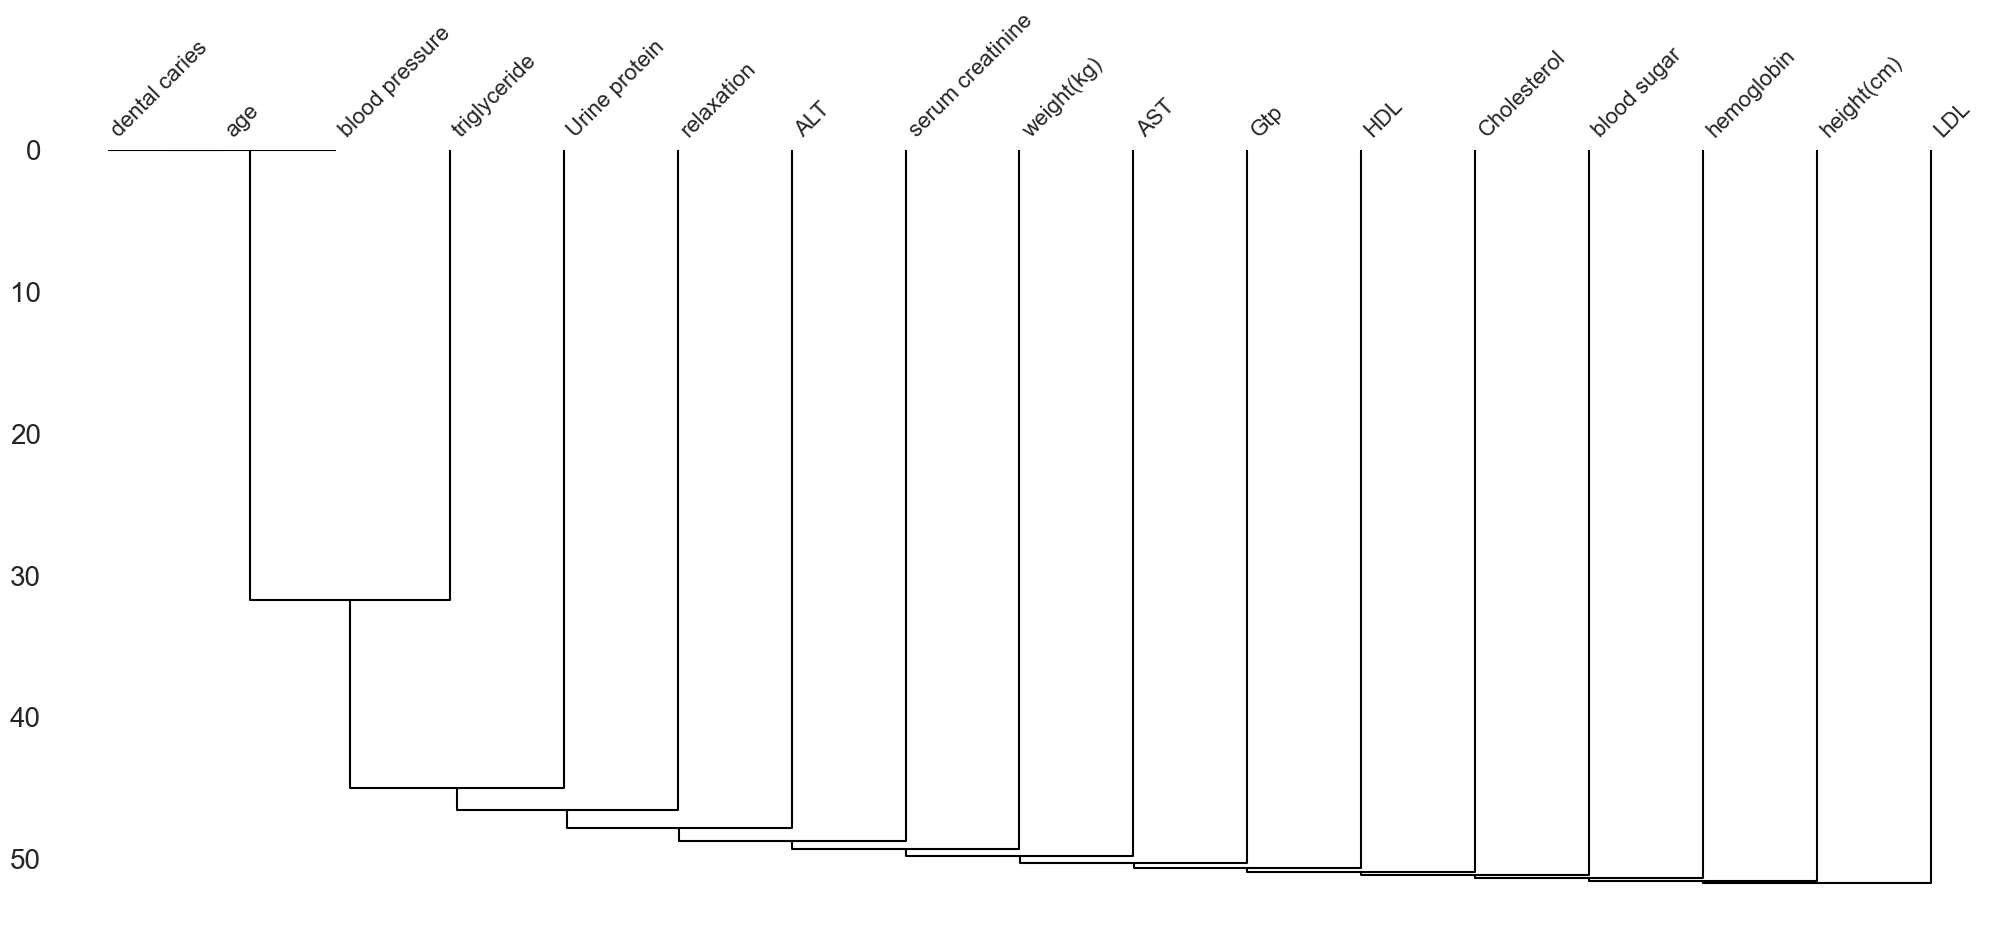

In [42]:
msno.dendrogram(df2)

## Handling the Missing Values
Handle the missing values using suitable method based on the insights obtained from the various visualizations.

In [ ]:
# Write your code here. Add as many boxes as you need.

In [14]:
df2['age'] = df2['age'].fillna(df2['age'].mean())

In [15]:
from sklearn.preprocessing import OrdinalEncoder, LabelEncoder

encoder = OrdinalEncoder()

columns_to_encode = ['triglyceride', 'dental caries']
df2[columns_to_encode] = encoder.fit_transform(df2[columns_to_encode])

In [139]:
df2.head()

,age,height(cm),weight(kg),relaxation,blood sugar,Cholesterol,triglyceride,HDL,LDL,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,dental caries,blood pressure
0,45.357052,180.0,65.0,70.0,NaN,149.0,NaN,NaN,87.0,13.9,1.0,NaN,19.0,NaN,NaN,0.0,112.0
1,45.000000,150.0,50.0,88.0,92.0,219.0,2.0,NaN,137.0,13.2,NaN,0.6,26.0,17.0,NaN,0.0,138.0
2,70.000000,175.0,75.0,NaN,NaN,217.0,3.0,50.0,142.0,NaN,1.0,0.8,22.0,22.0,NaN,0.0,137.0
3,40.000000,160.0,NaN,NaN,100.0,160.0,1.0,48.0,84.0,12.1,1.0,0.6,15.0,19.0,14.0,0.0,133.0
6,60.000000,155.0,50.0,74.0,NaN,NaN,2.0,59.0,NaN,13.5,1.0,0.7,44.0,28.0,17.0,0.0,138.0


In [16]:
df2['height(cm)'] = df2['height(cm)'].fillna(df2['height(cm)'].mean())
df2['weight(kg)'] = df2['weight(kg)'].fillna(df2['weight(kg)'].mean())


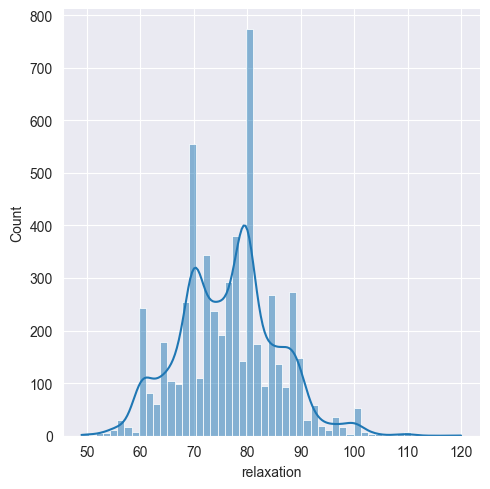

In [17]:
sns.displot(df2['relaxation'], kde=True)


In [78]:
df2.columns

Index(['age', 'height(cm)', 'weight(kg)', 'relaxation', 'blood sugar',
       'Cholesterol', 'triglyceride', 'HDL', 'LDL', 'hemoglobin',
       'Urine protein', 'serum creatinine', 'AST', 'ALT', 'Gtp',
       'dental caries', 'blood pressure'],
      dtype='object')

blood pressure -> relaxation
LDL -> cholesterol
hemoglobin -> weight, height
ALT -> AST

In [19]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer


mice = IterativeImputer(random_state=0)

imputed_values = mice.fit_transform(df2[['LDL', 'Cholesterol']])
df2[['LDL', 'Cholesterol']] = imputed_values

In [20]:
imputed_values = mice.fit_transform(df2[['hemoglobin', 'weight(kg)', 'height(cm)']])
df2[['hemoglobin', 'weight(kg)', 'height(cm)']] = imputed_values

In [21]:
imputed_values = mice.fit_transform(df2[['ALT', 'AST']])
df2[['ALT', 'AST']] = imputed_values

In [22]:
imputed_values = mice.fit_transform(df2[['blood pressure', 'relaxation']])
df2[['blood pressure', 'relaxation']] = imputed_values

In [23]:
from sklearn.impute import SimpleImputer
median_colums = ["blood sugar", 'HDL', "Urine protein", "serum creatinine", 'Gtp']

imputer = SimpleImputer(strategy='median')
df2[median_colums] = imputer.fit_transform(df2[median_colums])

In [24]:
frequent_imputer = SimpleImputer(strategy='most_frequent')
#df2['triglyceride'] = df2['triglyceride'].astype(str) 
df2['triglyceride'] = frequent_imputer.fit_transform(df2[['triglyceride']])

<Axes: ylabel='Frequency'>

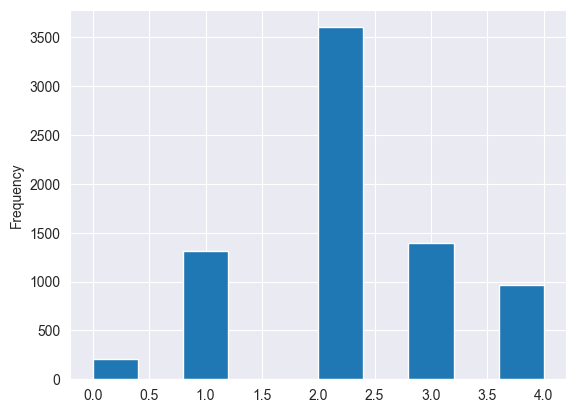

In [25]:
df2['triglyceride'].plot.hist()

In [26]:
missing_percentage = df2.isnull().sum() / len(df2) * 100
print(missing_percentage)

age                 0.0
height(cm)          0.0
weight(kg)          0.0
relaxation          0.0
blood sugar         0.0
Cholesterol         0.0
triglyceride        0.0
HDL                 0.0
LDL                 0.0
hemoglobin          0.0
Urine protein       0.0
serum creatinine    0.0
AST                 0.0
ALT                 0.0
Gtp                 0.0
dental caries       0.0
blood pressure      0.0
dtype: float64


## Feature Preprocessing


Preprocess the features to make them ready for using the model

In [ ]:
# Write your code here. Add as many boxes as you need.

In [29]:
df2


,age,height(cm),weight(kg),relaxation,blood sugar,Cholesterol,triglyceride,HDL,LDL,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,dental caries,blood pressure
0,45.357052,180.0,65.000000,70.000000,95.0,149.000000,2.0,55.0,87.000000,13.900000,1.0,0.9,19.0,16.321540,24.0,0.0,112.0
1,45.000000,150.0,50.000000,88.000000,92.0,219.000000,2.0,55.0,137.000000,13.200000,1.0,0.6,26.0,17.000000,24.0,0.0,138.0
2,70.000000,175.0,75.000000,84.384052,95.0,217.000000,3.0,50.0,142.000000,15.736423,1.0,0.8,22.0,22.000000,24.0,0.0,137.0
3,40.000000,160.0,65.220721,82.263562,100.0,160.000000,1.0,48.0,84.000000,12.100000,1.0,0.6,15.0,19.000000,14.0,0.0,133.0
6,60.000000,155.0,50.000000,74.000000,95.0,196.512376,2.0,59.0,115.508052,13.500000,1.0,0.7,44.0,28.000000,17.0,0.0,138.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,45.357052,180.0,75.000000,69.000000,100.0,180.000000,0.0,76.0,98.000000,14.700000,1.0,0.8,29.0,39.000000,73.0,0.0,120.0
9996,45.357052,160.0,65.220721,72.000000,100.0,179.680376,3.0,55.0,99.000000,15.300000,1.0,0.7,22.0,49.000000,91.0,0.0,110.0
9997,35.000000,165.0,65.000000,72.000000,83.0,207.000000,2.0,65.0,134.000000,14.647680,1.0,0.9,20.0,21.000000,23.0,0.0,128.0
9998,45.357052,160.0,75.000000,82.000000,88.0,192.935484,1.0,63.0,112.000000,14.400000,1.0,0.9,18.0,15.000000,64.0,0.0,121.0


## Model comparison with cross-validation

Train two models: XGBoost and RandomForest for predicting the target variable. Use 5-fold cross-validation to evaluate the performance of the models and compare them using adrquate metrics.

In [ ]:
# Write your code here. Add as many boxes as you need.

In [27]:
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV, KFold
from sklearn.model_selection import train_test_split

In [28]:
X = df2.drop("blood pressure", axis=1)
Y = df2['blood pressure']

In [38]:
xgb_model = XGBRegressor(max_depth=10, n_estimators=100, learning_rate=0.05, random_state=0)

In [31]:
rf_model = RandomForestRegressor(max_depth=8, n_estimators=100, random_state=0)

In [39]:
from sklearn.model_selection import cross_val_predict
xgb_preds = cross_val_predict(xgb_model, X, Y, cv=5)
rf_preds = cross_val_predict(rf_model, X, Y, cv=5)

In [40]:
from sklearn.metrics import mean_squared_error, r2_score

r2_score(Y, xgb_preds)


0.6666703474075348

In [35]:
r2_score(Y, rf_preds)

0.6766371482309983

In [36]:
mean_squared_error(Y, xgb_preds)

56.635494573767424

In [37]:
mean_squared_error(Y, rf_preds)

55.78413121481234

# Not needed

In [154]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=52)

In [155]:
xgb = XGBRegressor()
param_grid = {
    "learning_rate": [0.1, 0.01, 0.05],
    "max_depth":  [7, 9, 10],
    "n_estimators": [600, 800, 1000]    
}

In [157]:
kf = KFold(n_splits=5)

In [158]:
grid = GridSearchCV(estimator=xgb, param_grid=param_grid, cv=kf)
grid.fit(X_train, Y_train)

GridSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=False),
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, device=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None,
                                    grow_policy=None, importance_type=None,
                                    i...
                                    learning_rate=None, max_bin=None,
                                    max_cat_threshold=None,
                                    max_cat_to_onehot=None, max_delta_step=None,
                                    max_depth=None, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None,
                                    multi_strategy=None, n_estimators=None,
                                    n_jobs=None, num_parallel_tree=None,
                                    random_state=None, ...),
             param_grid={'learning_rate': [0.1, 0.01, 0.05],
                         'max_depth': [7, 9, 10],
                         'n_estimators': [600, 800, 1000]})

In [160]:
grid.best_score_

0.6630115972802292

In [163]:
rdf = RandomForestRegressor()
param_grid2 = {
    "criterion": ["squared_error", "absolute_error"],
    "max_depth":  [7, 9, 10],
    "n_estimators": [50, 100, 200]    
}
grid2 = GridSearchCV(estimator=rdf, param_grid=param_grid2, cv=kf)
grid2.fit(X_train, Y_train)

Exception ignored in: <function DMatrix.__del__ at 0x00000231277AC160>
Traceback (most recent call last):
  File "D:\FINKI\5 semestar\VovedVoNaukaNaPodatoci\vnp-24-25\.venv\lib\site-packages\xgboost\core.py", line 930, in __del__
    if hasattr(self, "handle"):
KeyboardInterrupt: 

KeyboardInterrupt



In [ ]:
grid2.best_score_

# Cross-Validation

In [ ]:
# Write your code here. Add as many boxes as you need.

Assess the performance of the models by using different metrics provided by the `scikit-learn` library.

In [ ]:
# Write your code here. Add as many boxes as you need.